# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Redomeire
- **Email:** redomeire@gmail.com
- **ID Dicoding:** redomeire21

## Menentukan Pertanyaan Bisnis

- Berapa jumlah penyewaan sepeda harian dan per jam berdasarkan cuaca?
- Pada jam berapa sajakah puncak penyewaan sepeda terjadi?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Data Wrangling

### Gathering Data

In [5]:
bikes_day_df = pd.read_csv('./data/day.csv')
bikes_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bikes_hour_df = pd.read_csv('./data/hour.csv')
bikes_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data


#### Menilai data bikes_day_df

**Insight:**
- Tidak ada missing value di dataframe ini

**Problem**
- seharusnya kolom dteday memiliki tipe data datetime

In [7]:
bikes_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Deskripsi**
<br>
Melakukan konfirmasi pengecekan missing value

**Insight:**
- Tidak ada missing value di dataframe ini

In [8]:
bikes_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada jumlah duplikasi data

In [9]:
print("Jumlah duplikasi : ", bikes_day_df.duplicated().sum())

Jumlah duplikasi :  0


**Insight:**
- Nilai valid
- Tidak ada innacurate value

In [10]:
bikes_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data bikes_hour_df

**Insight:**
- Tidak ada missing value di dataframe ini

**Problem**
- seharusnya kolom dteday memiliki tipe data datetime

In [11]:
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Deskripsi**
<br>
Melakukan konfirmasi pengecekan missing value

**Insight:**
- Tidak ada missing value di dataframe ini

In [12]:
bikes_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada jumlah duplikasi data

In [13]:
print("Jumlah duplikasi: ", bikes_hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Nilai valid
- Tidak ada innacurate value

In [14]:
bikes_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Ringkasan

1.   bikes_day_df

*   Terdapat kesalahan tipe data kolom dteday

2.   bikes_hour_df

*   Terdapat kesalahan tipe data kolom dteday



### Cleaning Data

### Membersihkan data bikes_hour_df

**Insight:**
- Mengubah tipe data kolom dteday menjadi datetime

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bikes_hour_df[column] = pd.to_datetime(bikes_hour_df[column])

In [16]:
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Membersihkan data bikes_day_df

**Insight:**
- Mengubah tipe data kolom dteday menjadi datetime

In [17]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bikes_day_df[column] = pd.to_datetime(bikes_day_df[column])

In [18]:
bikes_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Eksplorasi data bikes_day_df

In [19]:
bikes_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Distribusi cuaca harian

- nilai rata-rata cuaca berada di antara cuaca cerah (kode 1) dan cuaca berkabut (kode 2)
- data harian mencakup 3 cuaca saja. Tidak ada yang menyewa sepeda di cuaca hujan deras (kode 4)

In [20]:
bikes_day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
})

,instant
weathersit,
1,463
2,247
3,21


- Pada pivot table tersebut, jumlah penyewaan harian terbanyak terjadi pada cuaca cerah

### Eksplorasi data bikes_hour_df

In [21]:
bikes_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Distribusi cuaca per jam

- nilai rata-rata cuaca berada di antara cuaca cerah (kode 1) dan cuaca berkabut (kode 2)
- data harian mencakup semua cuaca. Ada yang menyewa sepeda di cuaca hujan ringan dan deras

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10576\2483652185.py:13: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x=weather_daily_mean.index, y=weather_daily_mean.values, hue=weather_daily_mean.index, palette=colors, ax=axes[0], legend=False)


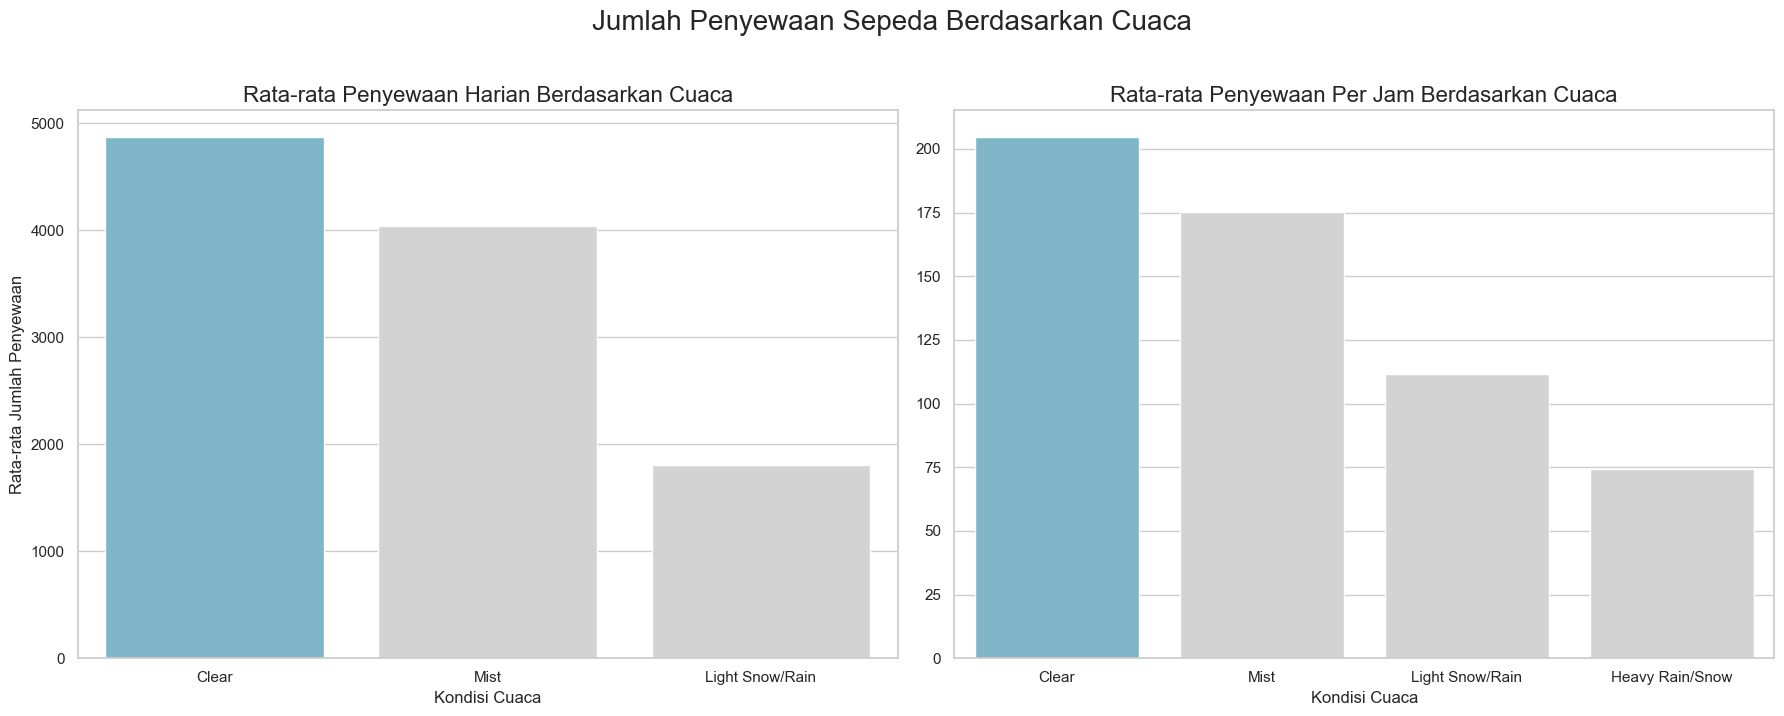

In [22]:
sns.set(style='whitegrid')

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
bikes_day_df['weather_desc'] = bikes_day_df['weathersit'].map(weather_map)
bikes_hour_df['weather_desc'] = bikes_hour_df['weathersit'].map(weather_map)

weather_daily_mean = bikes_day_df.groupby('weather_desc')['cnt'].mean().sort_values(ascending=False)
weather_hourly_mean = bikes_hour_df.groupby('weather_desc')['cnt'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.barplot(x=weather_daily_mean.index, y=weather_daily_mean.values, hue=weather_daily_mean.index, palette=colors, ax=axes[0], legend=False)
axes[0].set_title('Rata-rata Penyewaan Harian Berdasarkan Cuaca', fontsize=16)
axes[0].set_xlabel('Kondisi Cuaca', fontsize=12)
axes[0].set_ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)

sns.barplot(x=weather_hourly_mean.index, y=weather_hourly_mean.values, hue=weather_hourly_mean.index, palette=colors, ax=axes[1], legend=False)
axes[1].set_title('Rata-rata Penyewaan Per Jam Berdasarkan Cuaca', fontsize=16)
axes[1].set_xlabel('Kondisi Cuaca', fontsize=12)
axes[1].set_ylabel(None)
axes[1].yaxis.set_label_position("right")

plt.suptitle('Jumlah Penyewaan Sepeda Berdasarkan Cuaca', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

Untuk menjawab pertanyaan berikut,

> Berapa jumlah penyewaan sepeda harian dan per jam berdasarkan cuaca?

Berikut adalah diagram batang dari penyewaan harian dan per jam berdasarkan cuaca. Rata - rata Penyewaan sepeda paling banyak adalah saat cuaca cerah di kedua dataframe. Secara harian, rata - rata penyewaan sepeda terendah ada di cuaca hujan ringan. Sedangkan secara per jam, rata - rata penyewaan sepeda terendah ada di cuaca hujan deras

### Pertanyaan 2:

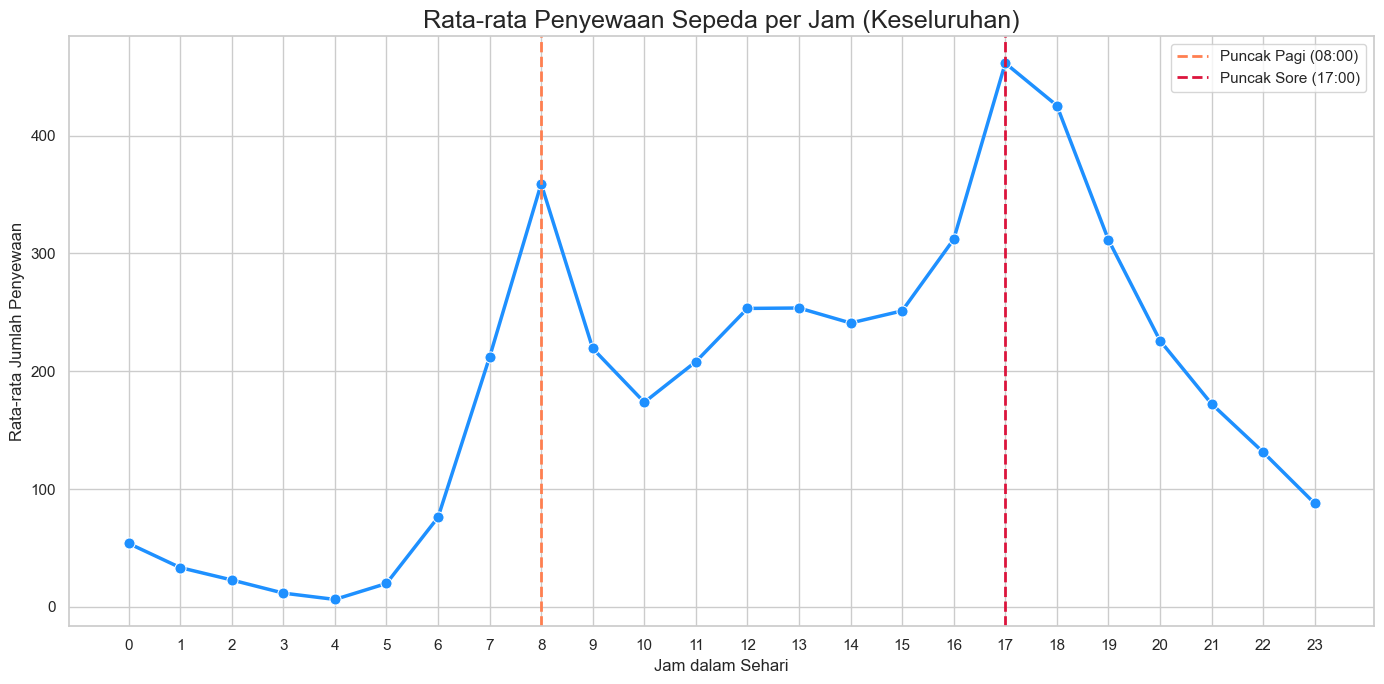

In [23]:
hourly_rentals = bikes_hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, color='dodgerblue', linewidth=2.5, marker='o', markersize=8)

plt.axvline(x=8, color='coral', linestyle='--', linewidth=2, label='Puncak Pagi (08:00)')
plt.axvline(x=17, color='crimson', linestyle='--', linewidth=2, label='Puncak Sore (17:00)')

plt.title('Rata-rata Penyewaan Sepeda per Jam (Keseluruhan)', fontsize=18)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()

Untuk menjawab pertanyaan berikut,

> Pada jam berapa sajakah puncak penyewaan tertinggi terjadi

Maka kita perlu melakukan grouping pada kolom `jam` dan `cnt` (hasil jumlah users).

- Pada linechart tersebut, terjadi penyewaan di titik terendah yaitu di jam 00.00 - 05.00, ini adalah jam istirahat yang sebagian besar orang tidak beraktivitas di luar

- Kemudian, terjadi lonjakan yang cukup drastis pada pukul 06.00 hingga puncaknya pukul 08.00. Hal ini menunjukkan bahwa adanya pengguna yang menggunakan sepeda untuk beraktivitas di luar (berangkat kerja atau sekolah)

- Tengah hari yakni pukul 10.00 - 15.00, jumlah penyewaan menurun tapi tetap cukup stabil

- 15.00 - 18.00 adalah puncak tertinggi penyewaan sepeda. Puncak sore ini bahkan lebih tinggi dari puncak pagi. Selanjutnya, penyewaan sepeda terus menurun hingga akhir hari

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2